In [3]:
import pandas as pd
import os
from pgtools.maf_parser import parse_maf, MAF
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
maf_dir = "/home/pampuch/studia/magisterka/test_data/klebsiella_subset_old/panaroo_new.maf"

In [7]:
maf = parse_maf(maf_dir)

In [8]:
small_maf = MAF(list(maf.seq_collections)[:300])

In [9]:
df_lens = pd.read_csv("/home/pampuch/studia/magisterka/test_data/klebsiella_subset_old/new_lens.csv")

In [10]:
df_lens

,block mean seq len,blocks count
0,1489,9
1,349,23
2,889,18
3,888,1
4,424,15
...,...,...
1752,1882,1
1753,512,1
1754,3013,1
1755,2503,1


In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [28]:
block_lens = []
for row in df_lens.iterrows():
    block_lens += [row[1]["block mean seq len"] * row[1]["blocks count"]]
block_lens = np.array(block_lens)

In [42]:
block_lens_all = [block_lens*i for i in range(1,4)]

In [61]:
def prep_hist_data(csv_file):
    df = pd.read_csv(csv_file)
    col_1, col_2 = list(df.columns)
    block_lens = []
    for row in df.iterrows():
        block_lens += [row[1][col_1]] * row[1][col_2]
    block_lens = np.array(block_lens)
    return block_lens

In [62]:
prep_hist_data("/home/pampuch/studia/magisterka/test_data/klebsiella_subset_old/new_lens.csv")

array([1489, 1489, 1489, ..., 3013, 2503,  695])

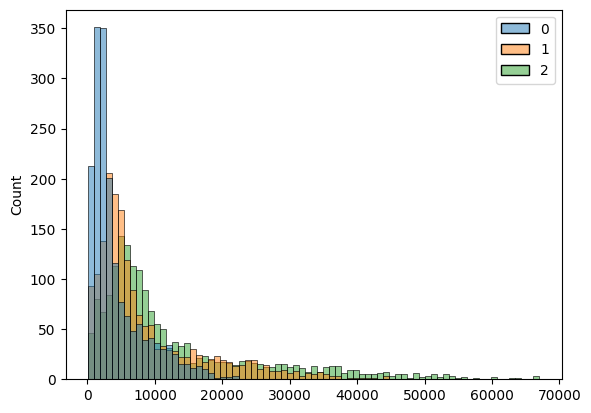

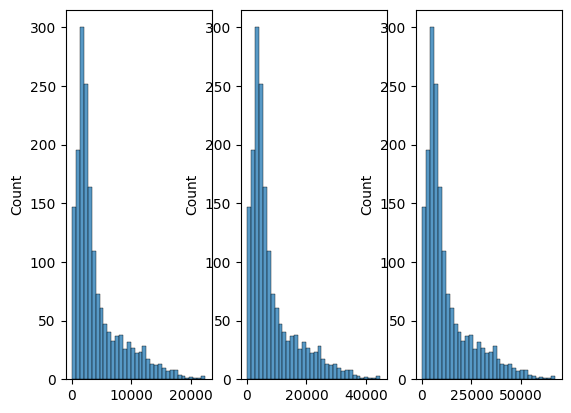

In [44]:
sns.histplot(block_lens_all)



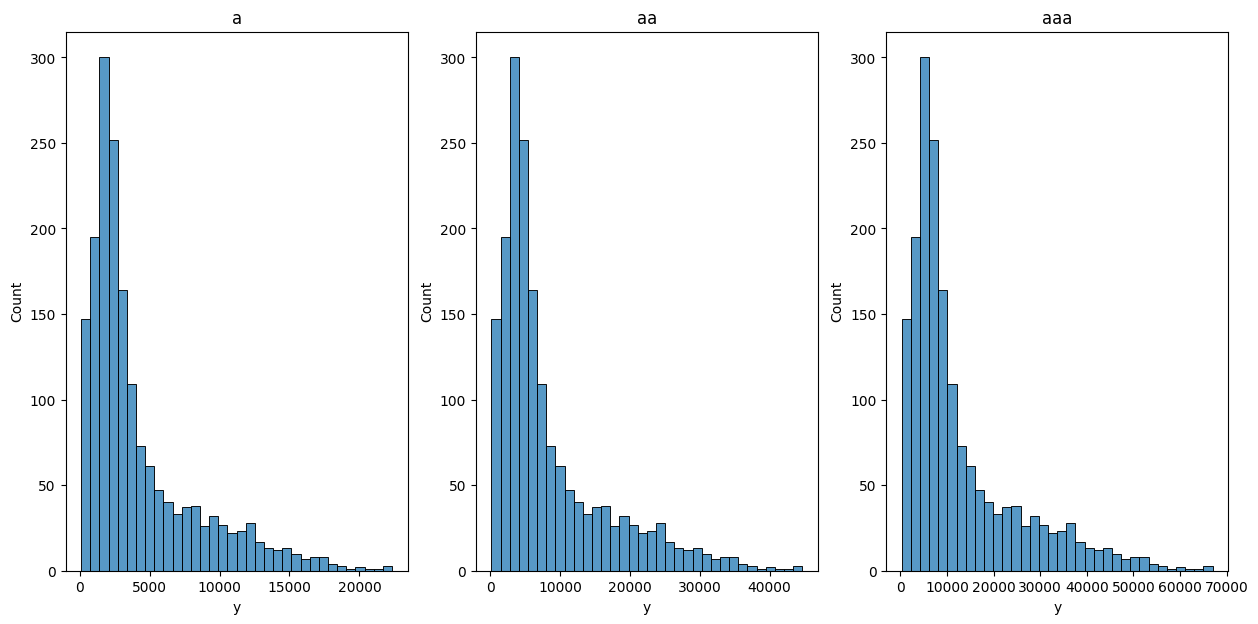

In [61]:
fig, axes = plt.subplots(1,3,figsize=(15, 7))
# fig.s
for i in range(3):
    sns.histplot(block_lens_all[i], ax=axes[i])
    axes[i].set_title("a"*(i+1))
    axes[i].set_xlabel("y")
plt.show()

In [1]:
boxplots_dir = "/home/pampuch/studia/magisterka/final_summaries/blocks_basic_stats_new/"

In [5]:
for f in os.listdir(boxplots_dir):
    print(f)
    for i in os.listdir(os.path.join(boxplots_dir, f)):
        print(i)

panaroo
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated_lens.csv
GPSC_subset_lens.csv
klebsiella_subset_lens.csv
klebsiella_subset_sizes.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_sizes.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_lens.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented_sizes.csv
GPSC_subset_sizes.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated_sizes.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented_lens.csv
cactus
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated_lens.csv
GPSC_subset_lens.csv
klebsiella_subset_lens.csv
klebsiella_subset_sizes.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_sizes.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_lens.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented_sizes.csv
GPSC_subset_sizes.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated_sizes.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented_lens.csv


In [21]:
# chcemy mieć po 3 (po 2) dla każdego datasetu

In [1]:
csv = "~/studia/magisterka/final_summaries/boxplots/blocks_hists_csv/cactus/ecoli_lens.csv"

In [6]:
def prep_hist_data(csv_file):
    df = pd.read_csv(csv_file)
    # col_1, col_2 = list(df.columns)
    # block_lens = []
    # for row in df.iterrows():
    #     block_lens += [row[1][col_1]] * row[1][col_2]
    # block_lens = np.array(block_lens)
    res = [[],[]]
    for col in df.columns:
        if col.endswith("count"):
           res[1] = df[col].to_numpy()
        else:
            res[0] = df[col].to_numpy()
    return res

In [15]:
prep_hist_data(csv)

[array([  19,  600,    2, ..., 6099, 1361, 4382]),
 array([4, 1, 8, ..., 1, 1, 1])]

In [11]:
prep_hist_data("~/studia/magisterka/final_summaries/boxplots/blocks_hists_csv/cactus/ecoli_sizes.csv")

array([101, 101, 101, ...,  25, 103, 104])

In [12]:
df = pd.read_csv("~/studia/magisterka/final_summaries/boxplots/blocks_hists_csv/cactus/ecoli_sizes.csv")

In [13]:
df

,block size,blocks count
0,101,1048
1,2,66
2,99,80
3,70,3
4,97,11
5,94,12
6,4,1
7,100,17
8,102,13
9,87,14


In [30]:
hist_data = {}
for f in os.listdir(boxplots_dir):
    print(f)
    for i in os.listdir(os.path.join(boxplots_dir, f)):
        print(i)
        dataset = i.replace("_sizes.csv","")
        dataset = dataset.replace("_lens.csv","")
        category=i.split("_")[-1].split(".")[0]
        print(category)
        print(dataset)
        if not dataset in hist_data:
            hist_data[dataset] = {}
        if not f in hist_data[dataset]:
            hist_data[dataset][f] = {}
        print("final", dataset, category)
        hist_data[dataset][f][category] = prep_hist_data(os.path.join(boxplots_dir,f,i))

panaroo
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated_lens.csv
lens
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
final sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated lens
GPSC_subset_lens.csv
lens
GPSC_subset
final GPSC_subset lens
klebsiella_subset_lens.csv
lens
klebsiella_subset
final klebsiella_subset lens
klebsiella_subset_sizes.csv
sizes
klebsiella_subset
final klebsiella_subset sizes
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_sizes.csv
sizes
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
final sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1 sizes
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_lens.csv
lens
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
final sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1 lens
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented_sizes.csv
sizes
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
final sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented sizes
GPSC_subset_sizes.csv
sizes
GPSC_subset
final GPSC_subset sizes
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated_sizes.csv
sizes
sim_gr_1e-11_lr_1e-12_mu_1e-15_

In [31]:
for dataset, models in hist_data.items():
    print(models.keys())
    for model, par in models.items():
        print(par.keys())

dict_keys(['panaroo', 'cactus'])
dict_keys(['lens', 'sizes'])
dict_keys(['lens', 'sizes'])
dict_keys(['panaroo', 'cactus'])
dict_keys(['lens', 'sizes'])
dict_keys(['lens', 'sizes'])
dict_keys(['panaroo', 'cactus'])
dict_keys(['lens', 'sizes'])
dict_keys(['lens', 'sizes'])
dict_keys(['panaroo', 'cactus'])
dict_keys(['sizes', 'lens'])
dict_keys(['sizes', 'lens'])
dict_keys(['panaroo', 'cactus'])
dict_keys(['sizes', 'lens'])
dict_keys(['sizes', 'lens'])


In [13]:
def datasets_mapping(x):
    if x.startswith("sim"):
        x= x.replace("sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1", "E. coli ")
    else:
        x= x.replace("_subset", "")
        x= x.replace("GPSC", "Pneumococcus")
        x = x.replace("klebsiella", "Klebsiella")
    return x.strip().replace("_","")


dict_keys(['lens', 'sizes'])
dict_keys(['lens', 'sizes'])
dict_keys(['lens', 'sizes'])
dict_keys(['lens', 'sizes'])
dict_keys(['lens', 'sizes'])
dict_keys(['lens', 'sizes'])
dict_keys(['sizes', 'lens'])
dict_keys(['sizes', 'lens'])
dict_keys(['sizes', 'lens'])
dict_keys(['sizes', 'lens'])


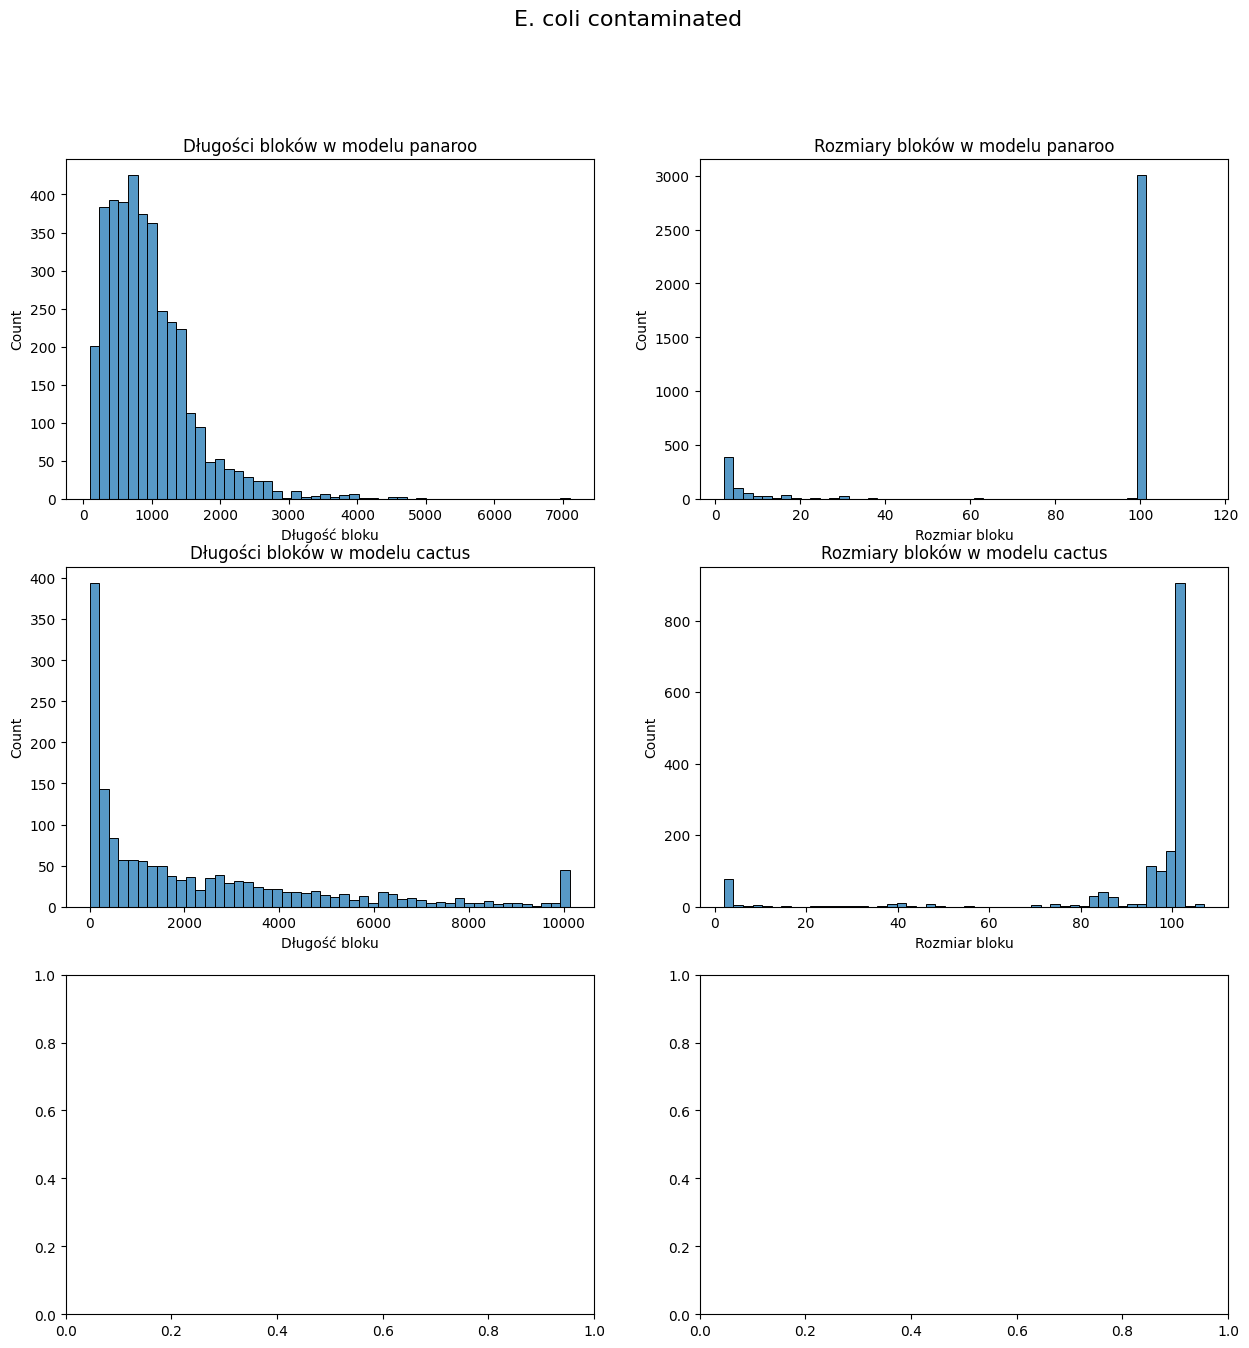

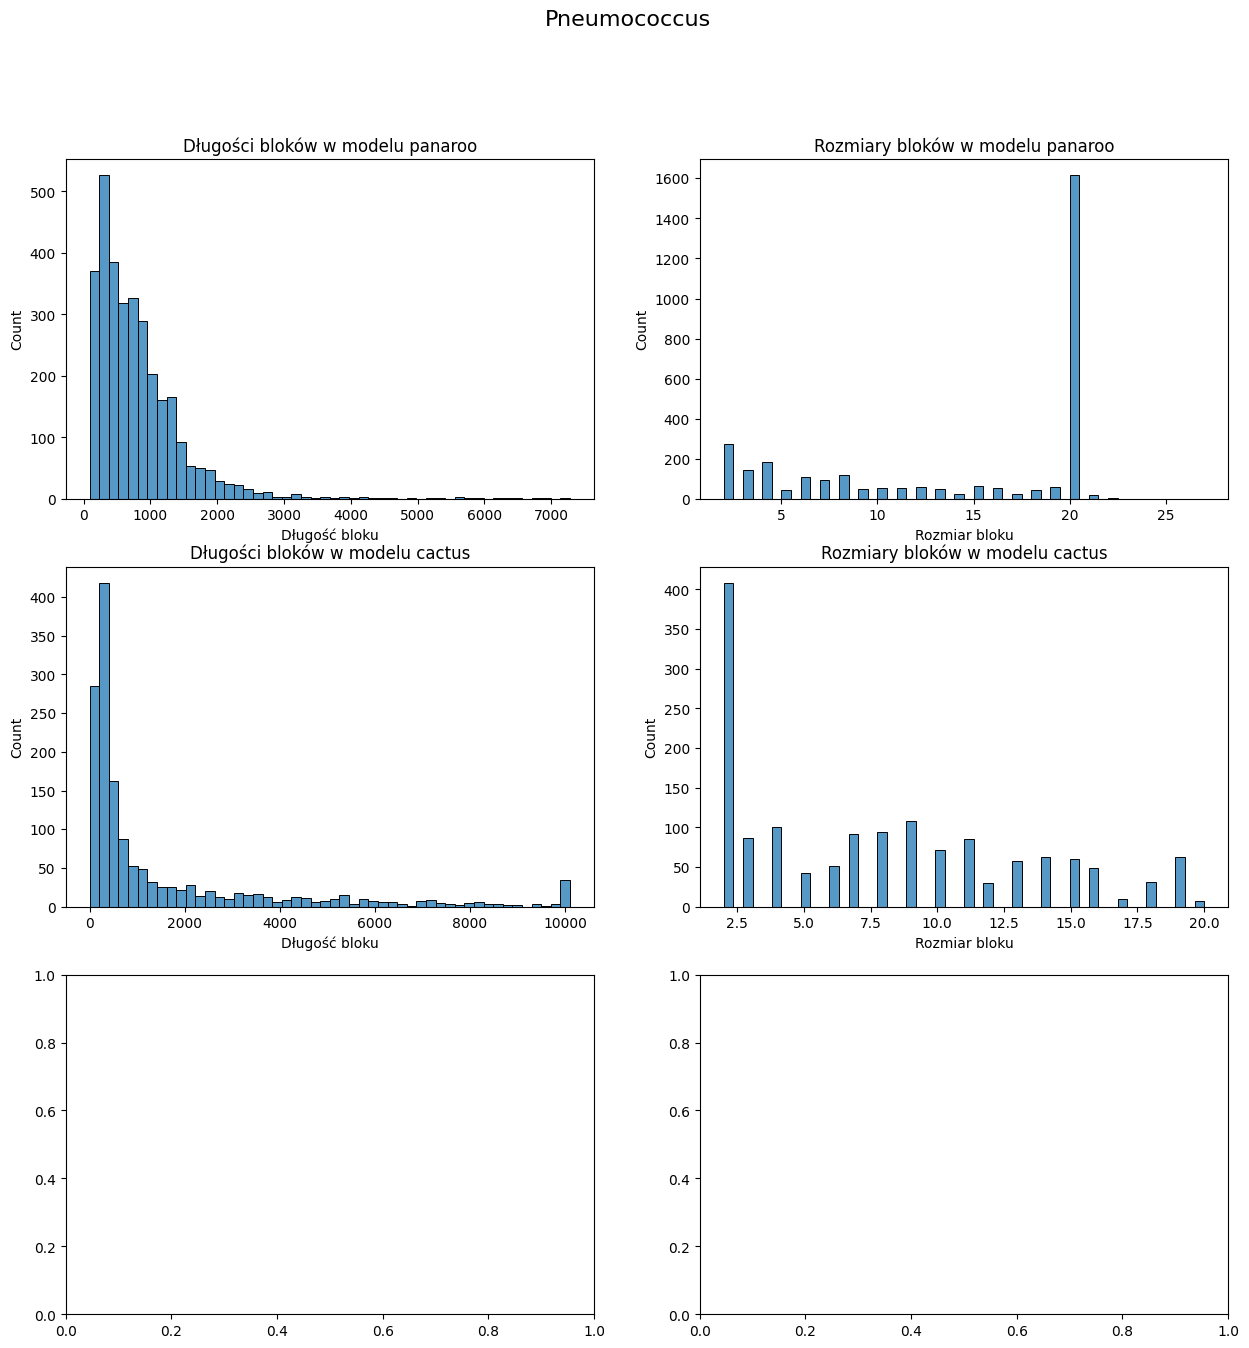

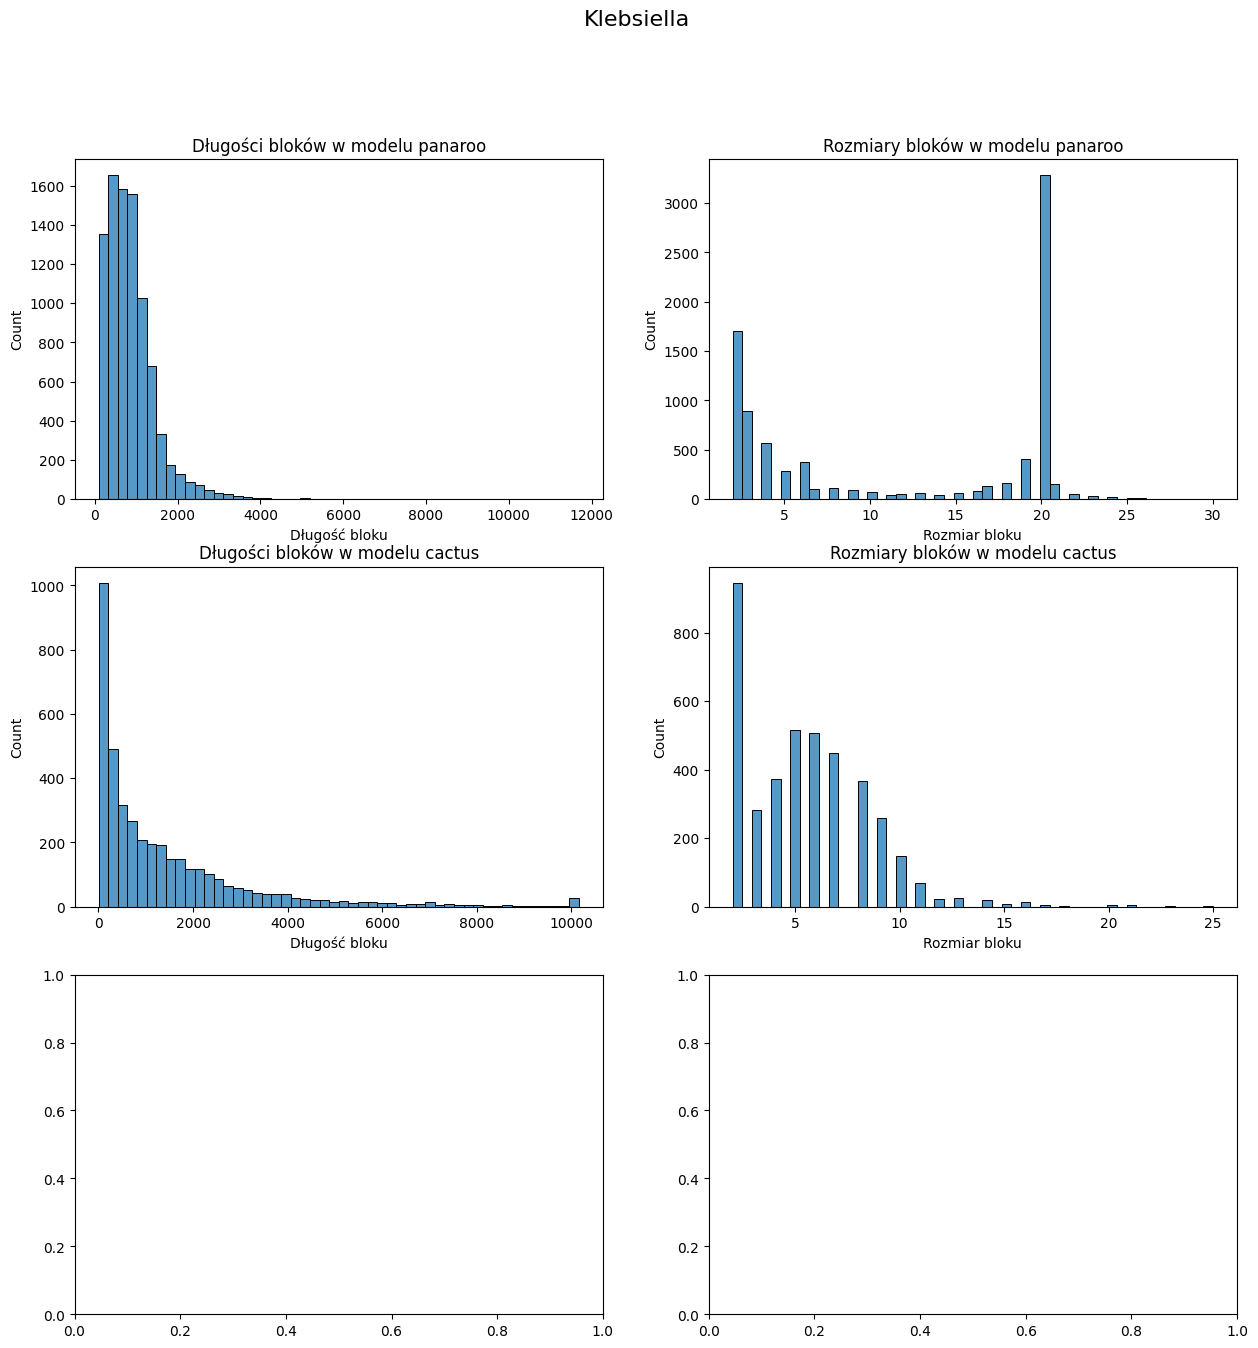

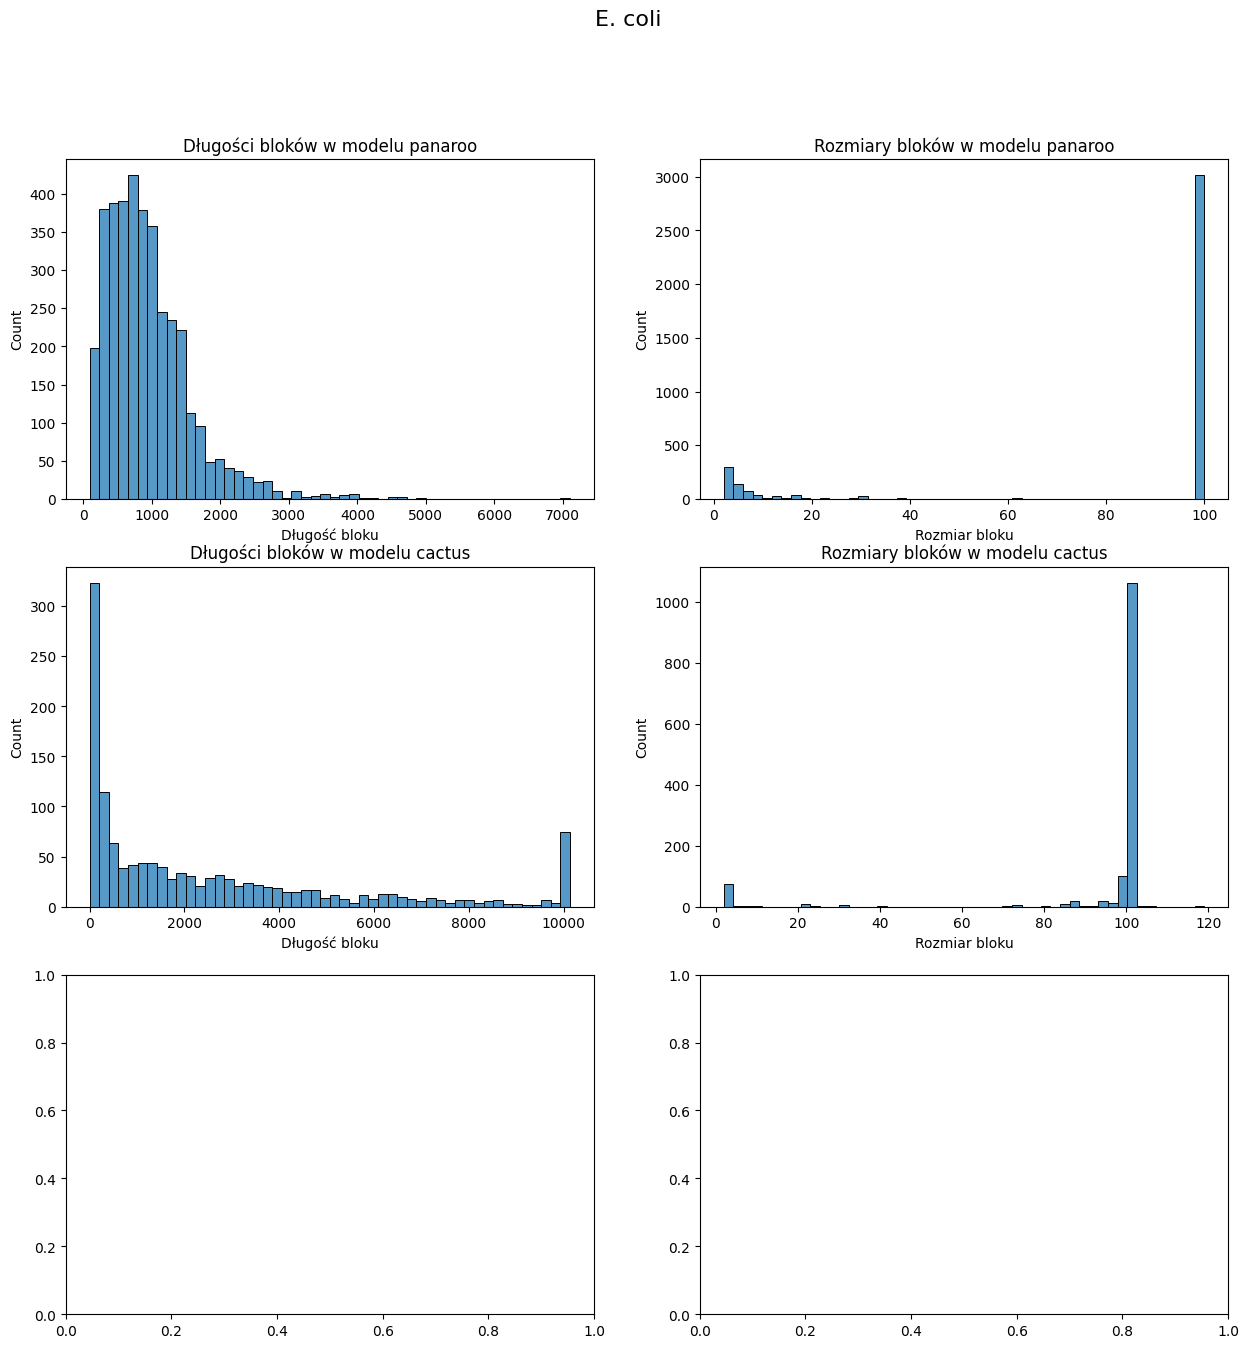

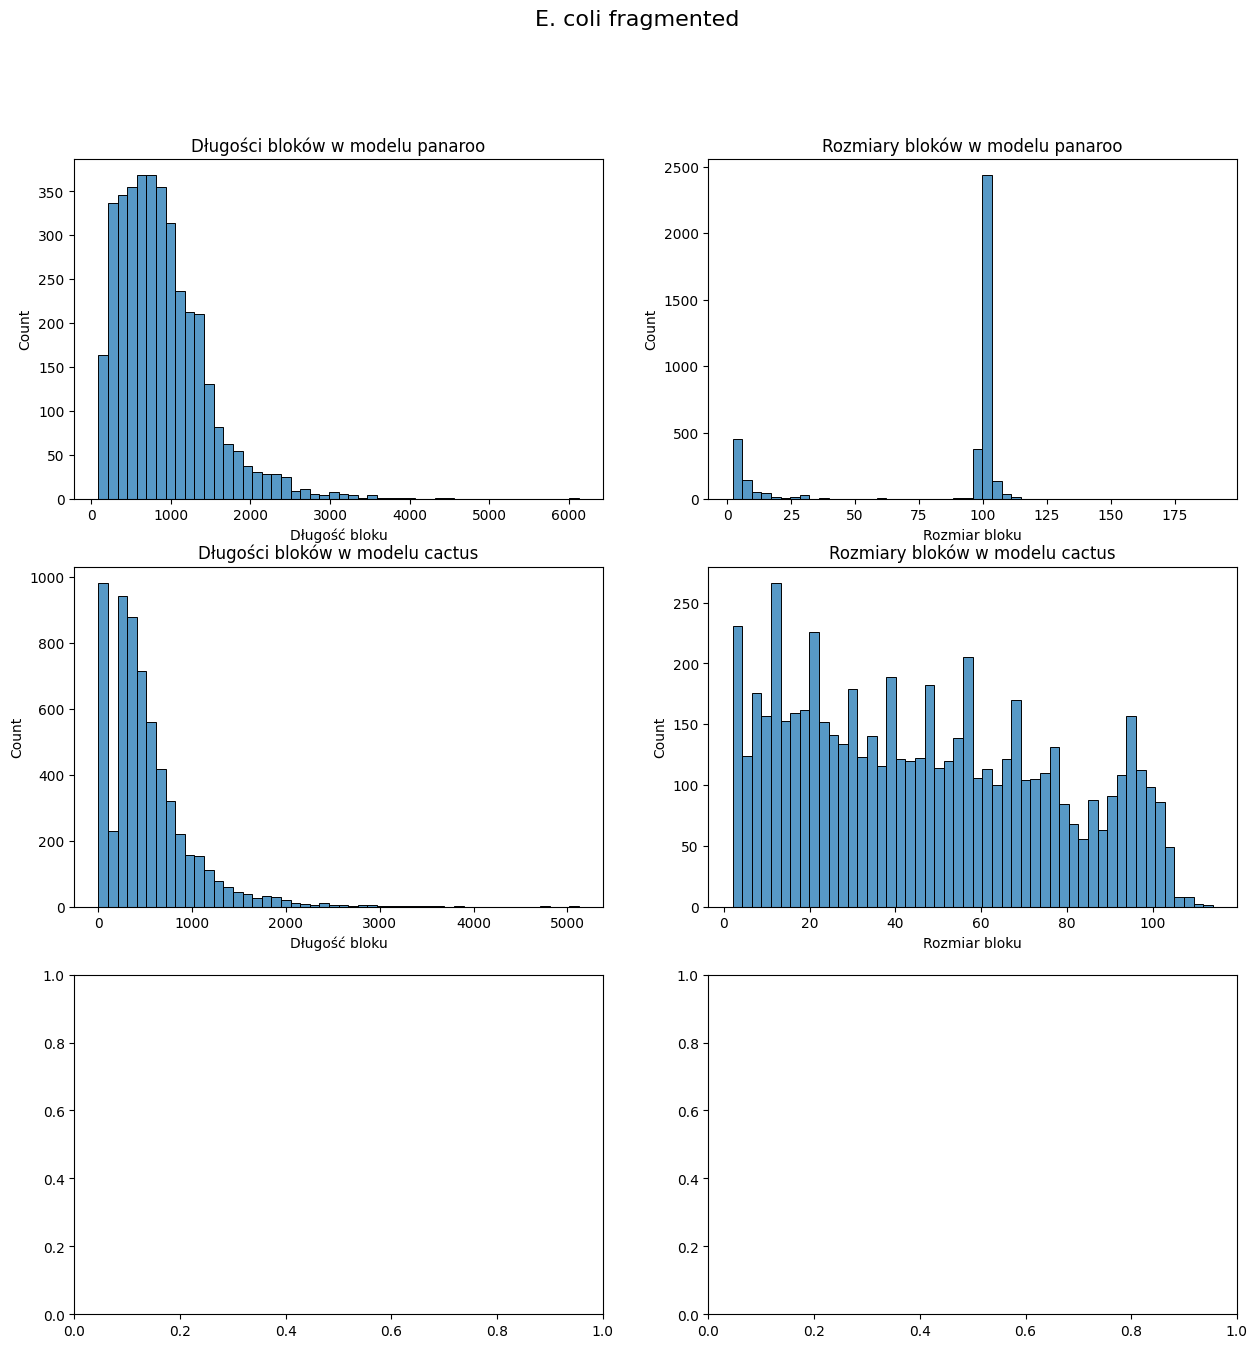

In [33]:
title_map = {"GPSC": "Pneumococcus", "klebsiella":"Klebsiella", "ecoli": "E. coli"}
for dataset, models in hist_data.items():
    fig, axes = plt.subplots(3,2,figsize=(15, 15))
    # fig.s
    c = 0
    r = 0
    for model, par in models.items():
        print(par.keys())
        # print(model, par)
        sns.histplot(x=par["lens"][0], weights=par["lens"][1], ax=axes[c,0], bins=50)
        axes[c,0].set_title(f"Długości bloków w modelu {model}")
        axes[c,0].set_xlabel("Długość bloku")
        sns.histplot(x=par["sizes"][0], weights=par["sizes"][1], ax=axes[c,1], bins=50)
        axes[c,1].set_title(f"Rozmiary bloków w modelu {model}")
        axes[c,1].set_xlabel("Rozmiar bloku")
        fig.suptitle(datasets_mapping(dataset), fontsize=16)
        c += 1
    plt.savefig(f"{dataset}.svg")

In [ ]:
title_map = {"GPSC": "Pneumococcus", "klebsiella":"Klebsiella", "ecoli": "E. coli"}
for dataset, models in hist_data.items():
    fig, axes = plt.subplots(3,2,figsize=(15, 15))
    # fig.s
    c = 0
    r = 0
    for model, par in models.items():
        print(par.keys())
        # print(model, par)
        sns.histplot(x=par["lens"][0], weights=par["lens"][1], ax=axes[c,0], bins=50)
        axes[c,0].set_title(f"Długości bloków w modelu {model}")
        axes[c,0].set_xlabel("Długość bloku")
        sns.histplot(x=par["sizes"][0], weights=par["sizes"][1], ax=axes[c,1], bins=50)
        axes[c,1].set_title(f"Rozmiary bloków w modelu {model}")
        axes[c,1].set_xlabel("Rozmiar bloku")
        fig.suptitle(datasets_mapping(dataset), fontsize=16)
        c += 1
    plt.savefig(f"{dataset}.svg")

In [34]:
for dataset in hist_data:
    print(dataset)

sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
GPSC_subset
klebsiella_subset
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented


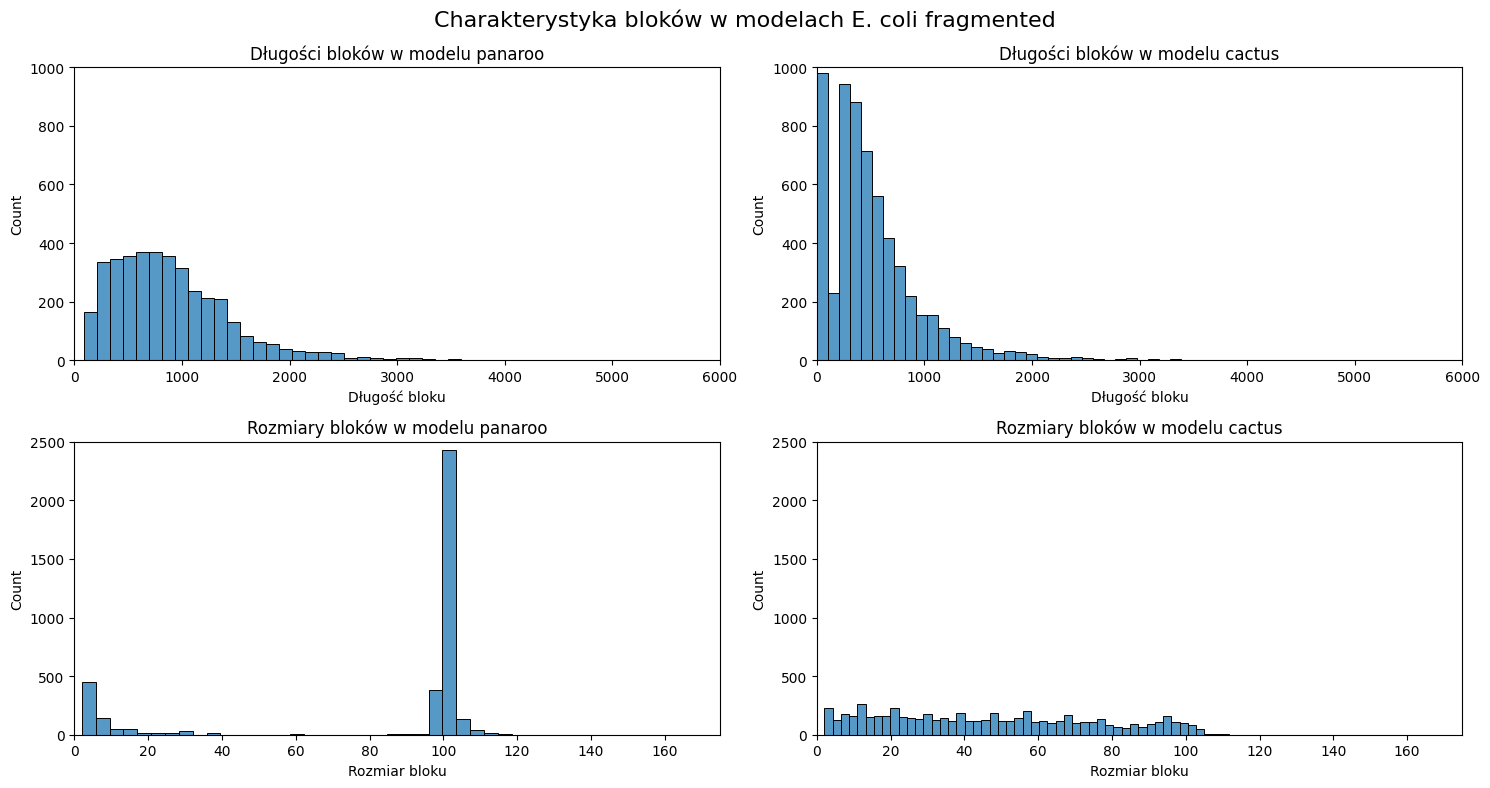

In [68]:
dataset = "sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented"
fig, axes = plt.subplots(2,2,figsize=(15, 8))
# fig.s
c = 0
r = 0
for model, par in hist_data[dataset].items():
    # print(par.keys())
    # print(model, par)
    sns.histplot(x=par["lens"][0], weights=par["lens"][1], ax=axes[0,c], bins=50)
    axes[0,c].set_title(f"Długości bloków w modelu {model}")
    axes[0,c].set_xlabel("Długość bloku")
    axes[0,c].set(xlim=(0,6000))
    axes[0,c].set(ylim=(0,1000))
    
    sns.histplot(x=par["sizes"][0], weights=par["sizes"][1], ax=axes[1,c], bins=50)
    axes[1,c].set_title(f"Rozmiary bloków w modelu {model}")
    axes[1,c].set_xlabel("Rozmiar bloku")
    axes[1,c].set(xlim=(0,175))
    axes[1,c].set(ylim=(0,2500))
    
    fig.suptitle(f"Charakterystyka bloków w modelach {datasets_mapping(dataset)}", fontsize=16)
    c += 1
fig.tight_layout()
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/blocks_basic_stats_new/{dataset}.svg")
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/blocks_basic_stats_new/{dataset}.png")

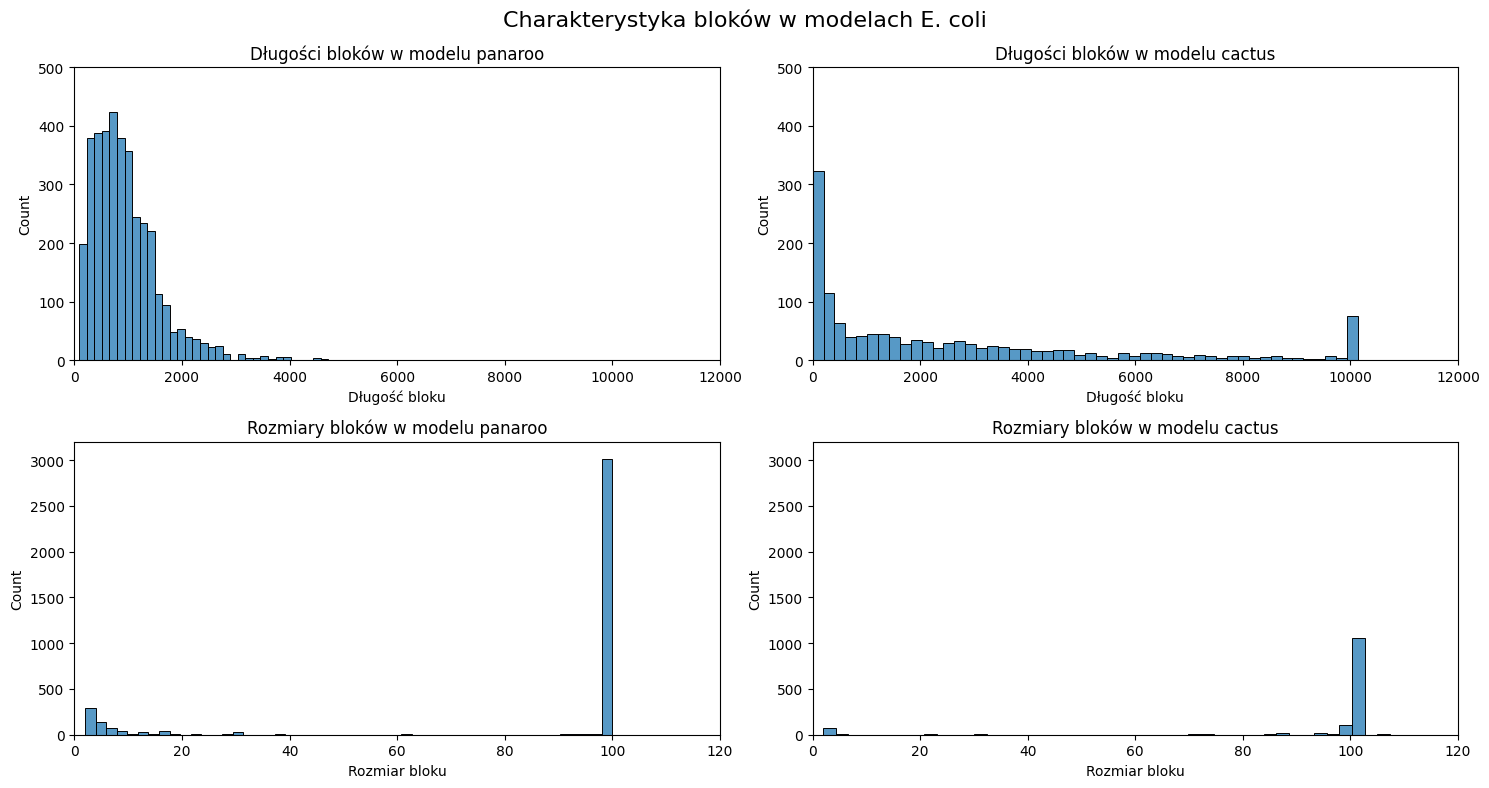

In [69]:
dataset = "sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1"
fig, axes = plt.subplots(2,2,figsize=(15, 8))
# fig.s
c = 0
r = 0
for model, par in hist_data[dataset].items():
    # print(par.keys())
    # print(model, par)
    sns.histplot(x=par["lens"][0], weights=par["lens"][1], ax=axes[0,c], bins=50)
    axes[0,c].set_title(f"Długości bloków w modelu {model}")
    axes[0,c].set_xlabel("Długość bloku")
    axes[0,c].set(xlim=(0,12000))
    axes[0,c].set(ylim=(0,500))
    
    sns.histplot(x=par["sizes"][0], weights=par["sizes"][1], ax=axes[1,c], bins=50)
    axes[1,c].set_title(f"Rozmiary bloków w modelu {model}")
    axes[1,c].set_xlabel("Rozmiar bloku")
    axes[1,c].set(xlim=(0,120))
    axes[1,c].set(ylim=(0,3200))
    
    fig.suptitle(f"Charakterystyka bloków w modelach {datasets_mapping(dataset)}", fontsize=16)
    c += 1
fig.tight_layout()
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/blocks_basic_stats_new/{dataset}.svg")
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/blocks_basic_stats_new/{dataset}.png")

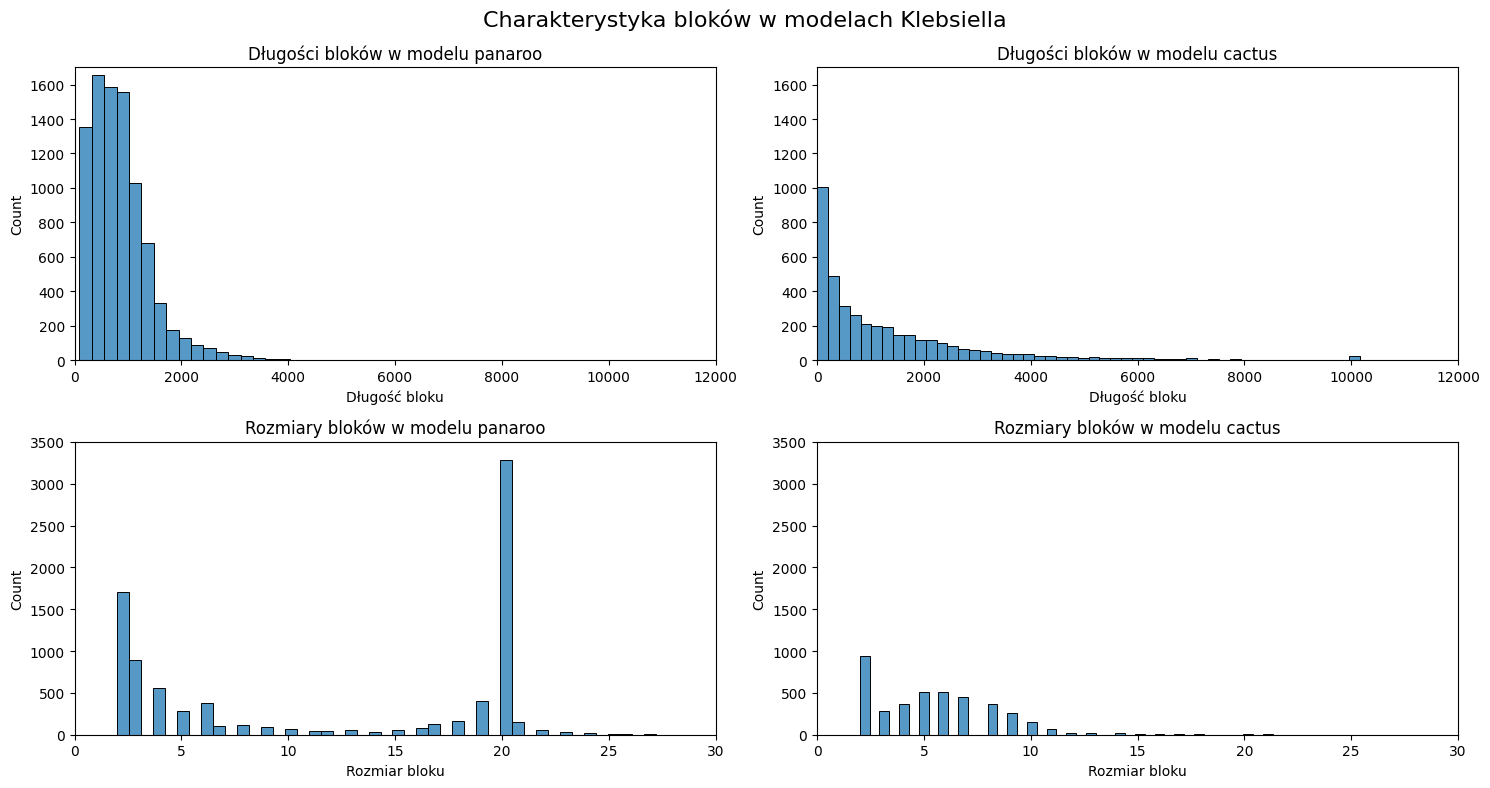

In [70]:
dataset = "klebsiella_subset"
fig, axes = plt.subplots(2,2,figsize=(15, 8))
# fig.s
c = 0
r = 0
for model, par in hist_data[dataset].items():
    # print(par.keys())
    # print(model, par)
    sns.histplot(x=par["lens"][0], weights=par["lens"][1], ax=axes[0,c], bins=50)
    axes[0,c].set_title(f"Długości bloków w modelu {model}")
    axes[0,c].set_xlabel("Długość bloku")
    axes[0,c].set(xlim=(0,12000))
    axes[0,c].set(ylim=(0,1700))
    
    sns.histplot(x=par["sizes"][0], weights=par["sizes"][1], ax=axes[1,c], bins=50)
    axes[1,c].set_title(f"Rozmiary bloków w modelu {model}")
    axes[1,c].set_xlabel("Rozmiar bloku")
    axes[1,c].set(xlim=(0,30))
    axes[1,c].set(ylim=(0,3500))
    
    fig.suptitle(f"Charakterystyka bloków w modelach {datasets_mapping(dataset)}", fontsize=16)
    c += 1
fig.tight_layout()
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/blocks_basic_stats_new/{dataset}.svg")
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/blocks_basic_stats_new/{dataset}.png")

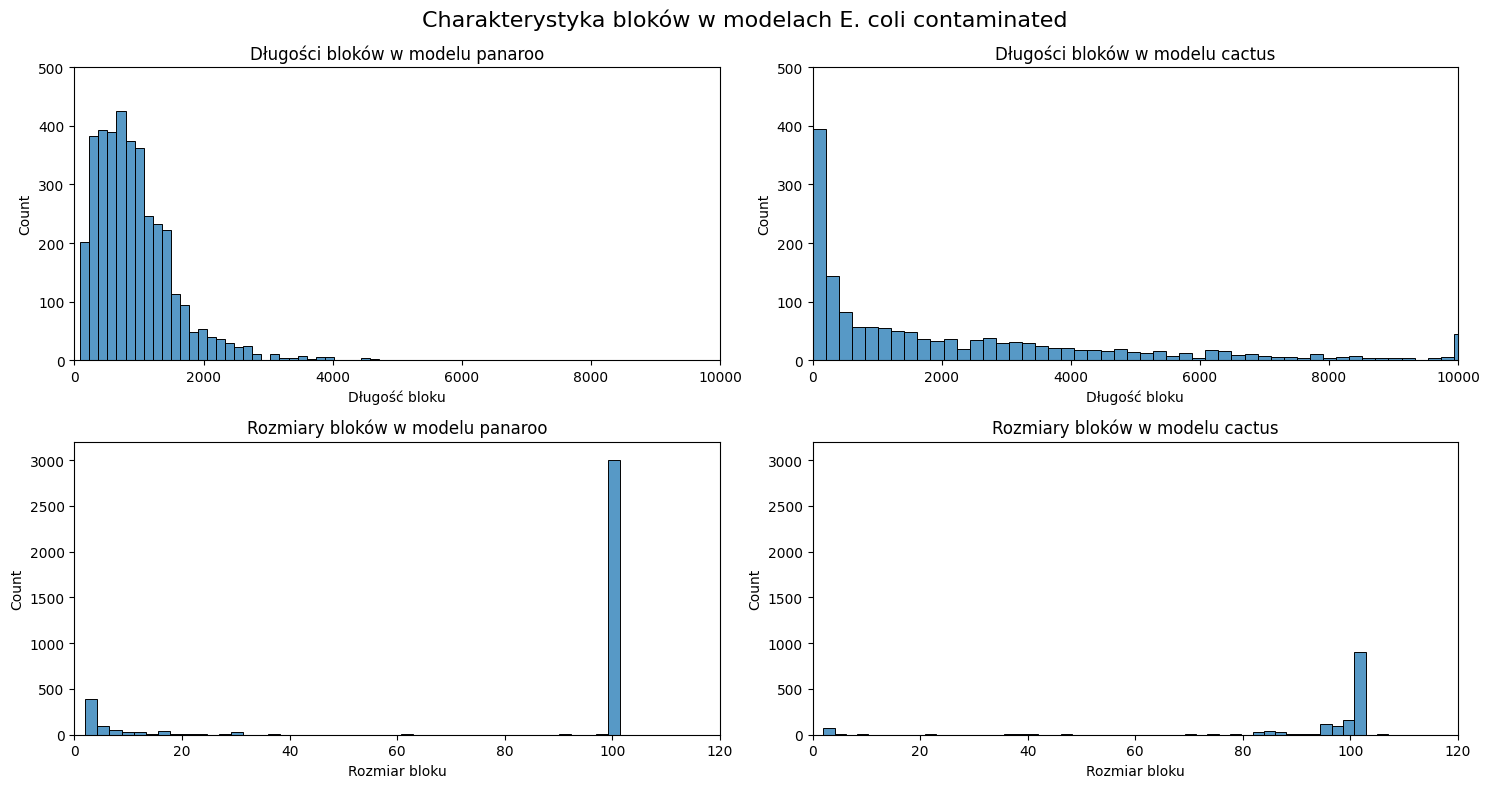

In [71]:
dataset = "sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated"
fig, axes = plt.subplots(2,2,figsize=(15, 8))
# fig.s
c = 0
r = 0
for model, par in hist_data[dataset].items():
    # print(par.keys())
    # print(model, par)
    sns.histplot(x=par["lens"][0], weights=par["lens"][1], ax=axes[0,c], bins=50)
    axes[0,c].set_title(f"Długości bloków w modelu {model}")
    axes[0,c].set_xlabel("Długość bloku")
    axes[0,c].set(xlim=(0,10000))
    axes[0,c].set(ylim=(0,500))
    
    sns.histplot(x=par["sizes"][0], weights=par["sizes"][1], ax=axes[1,c], bins=50)
    axes[1,c].set_title(f"Rozmiary bloków w modelu {model}")
    axes[1,c].set_xlabel("Rozmiar bloku")
    axes[1,c].set(xlim=(0,120))
    axes[1,c].set(ylim=(0,3200))
    
    fig.suptitle(f"Charakterystyka bloków w modelach {datasets_mapping(dataset)}", fontsize=16)
    c += 1
fig.tight_layout()
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/blocks_basic_stats_new/{dataset}.svg")
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/blocks_basic_stats_new/{dataset}.png")

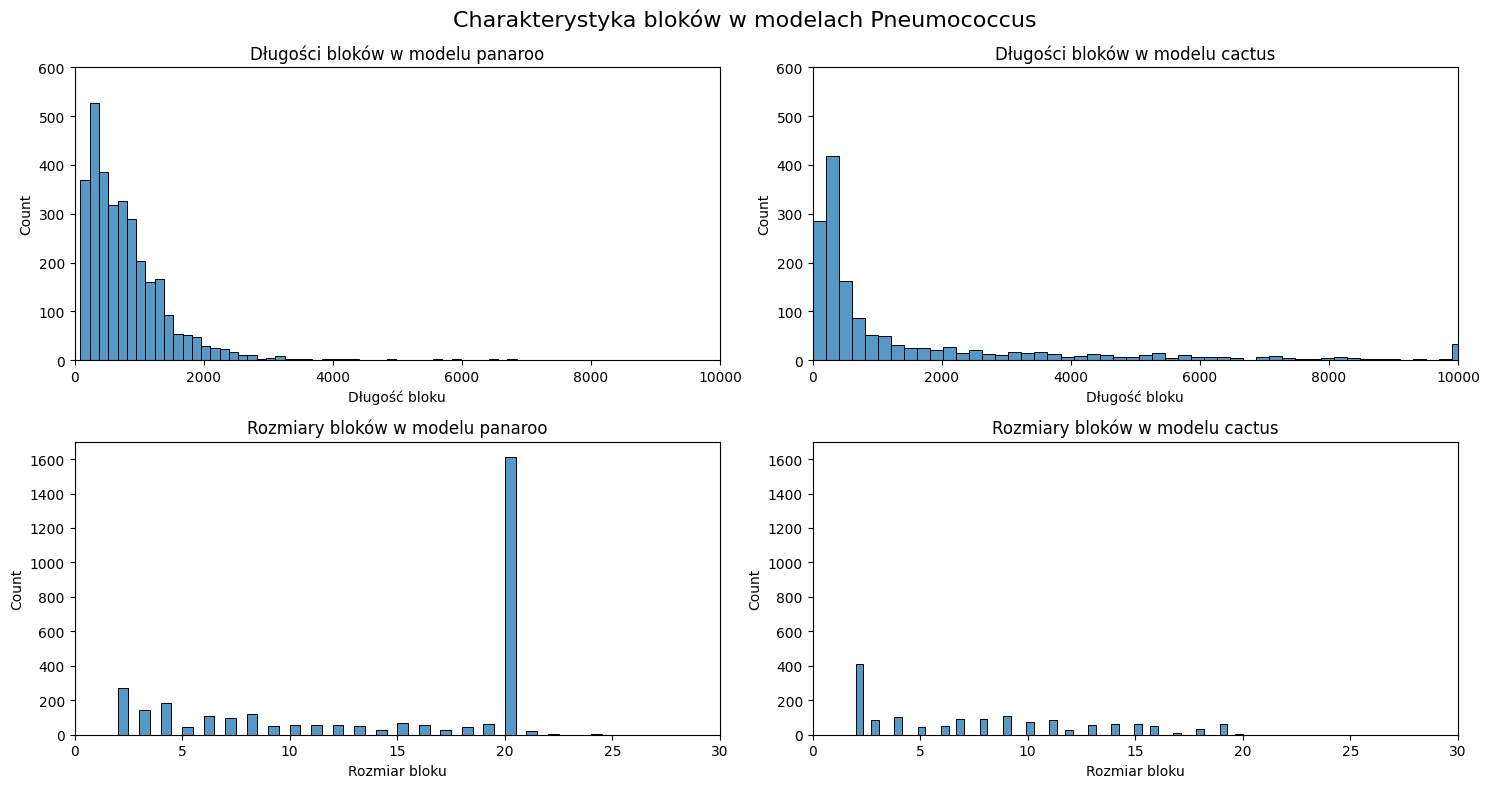

In [72]:
dataset = "GPSC_subset"
fig, axes = plt.subplots(2,2,figsize=(15, 8))
# fig.s
c = 0
r = 0
for model, par in hist_data[dataset].items():
    # print(par.keys())
    # print(model, par)
    sns.histplot(x=par["lens"][0], weights=par["lens"][1], ax=axes[0,c], bins=50)
    axes[0,c].set_title(f"Długości bloków w modelu {model}")
    axes[0,c].set_xlabel("Długość bloku")
    axes[0,c].set(xlim=(0,10000))
    axes[0,c].set(ylim=(0,600))
    
    sns.histplot(x=par["sizes"][0], weights=par["sizes"][1], ax=axes[1,c], bins=50)
    axes[1,c].set_title(f"Rozmiary bloków w modelu {model}")
    axes[1,c].set_xlabel("Rozmiar bloku")
    axes[1,c].set(xlim=(0,30))
    axes[1,c].set(ylim=(0,1700))
    
    fig.suptitle(f"Charakterystyka bloków w modelach {datasets_mapping(dataset)}", fontsize=16)
    c += 1
fig.tight_layout()
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/blocks_basic_stats_new/{dataset}.svg")
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/blocks_basic_stats_new/{dataset}.png")